# SyriaTel Customer Churn - A Classification Case

## Introduction
Customer churn is a major challenge to many businesses, especially those dealing with customers who make subscriptions. The project seeks to solve this real-world problem through giving informed reccomendations based on an effective model. The key stakeholder in the case of SyriaTel is the Customer Retention Department, who will need to adopt the recommendations so as to reduce the rate of customers leaving.

## Business Problem

Syriatel, a telecom provider, is experiencing customer churn. The retention team wants to use data to predict which customers are most likely to leave, so they can intervene with retention strategies.

## Reserach Objectives

To build a classification model to predict customer churn;\
To provide business recommendations based on model insights.


### Understanding the Data:

In [6]:
# Importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

# Quick overview
df.head()
df.info()
df.describe()
df['churn'].value_counts(normalize=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64

### Preparing the Data

Step1: Getting X_train and X_test from a train-test split.

In [7]:
from sklearn.model_selection import train_test_split

# Having our dataframe named 'df' and 'churn' as the target column
X = df.drop('churn', axis=1)
y = df['churn']

# Convert categorical features if needed (e.g., using get_dummies or OneHotEncoder)
X = pd.get_dummies(X, drop_first=True)

# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step2: Handling missing values

In [8]:
# Handle missing values
df.isnull().sum()

# Drop or fill missing data
# Convert 'total intl charge' to numeric if needed
df['total intl charge'] = pd.to_numeric(df['total intl charge'], errors='coerce')


# Encode target
df['churn'] = df['churn'].map({'Yes': 1, 'No': 0})

# One-hot encode categorical features
df = pd.get_dummies(df, drop_first=True)

# Train-test split
from sklearn.model_selection import train_test_split
X = df.drop('churn', axis=1)
y = df['churn']
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Baseline Modeling - Logistic Regression

In [9]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:, 1]))


              precision    recall  f1-score   support

       False       0.85      1.00      0.92       566
        True       0.00      0.00      0.00       101

    accuracy                           0.85       667
   macro avg       0.42      0.50      0.46       667
weighted avg       0.72      0.85      0.78       667

ROC AUC: 0.8219046286254067


c:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##### Visualization for the logistics regression:

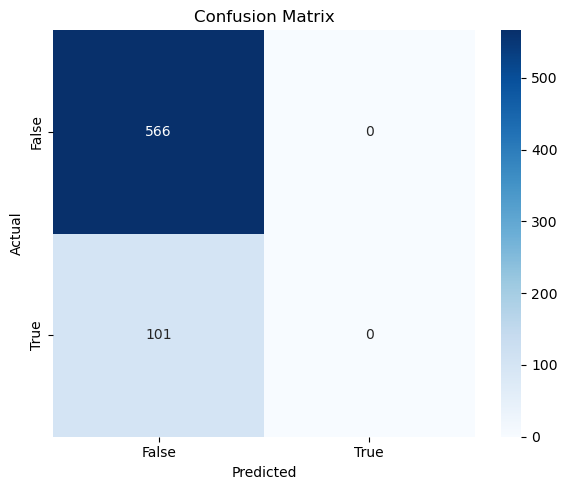

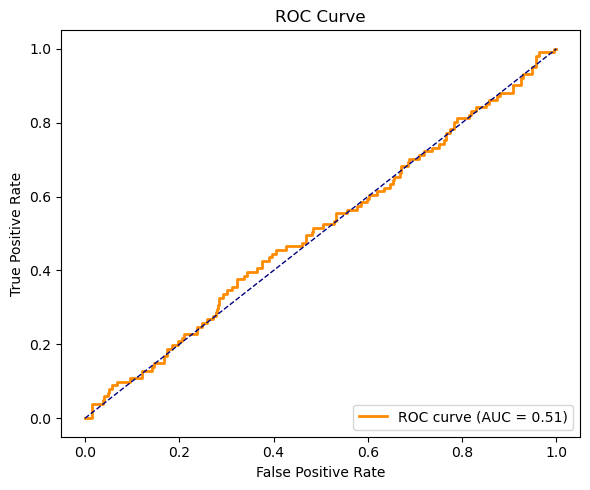

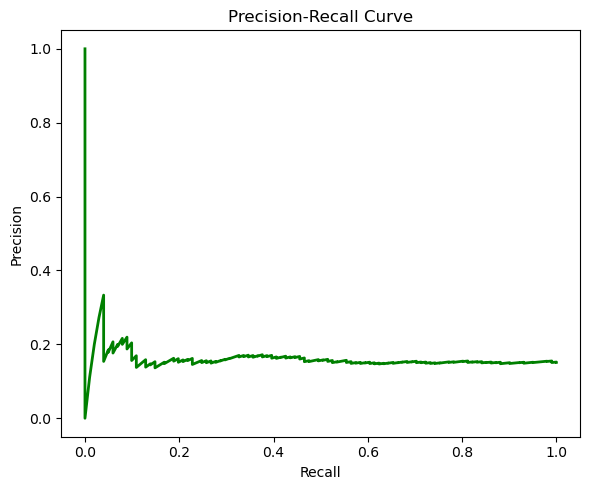

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
import numpy as np

# Simulated labels based on your report
y_true = [0]*566 + [1]*101  # 0 = False, 1 = True
y_pred = [0]*667            # Model predicted everything as class 0 (False)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
labels = ['False', 'True']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Simulated probabilities (since predictions are all class 0)
# Just to create ROC and PR curves
y_scores = np.random.uniform(0.0, 0.2, size=667)  # low-confidence dummy scores

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_true, y_scores)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.tight_layout()
plt.show()


### Non-Parametric Model - Decision Tree

In [10]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(classification_report(y_test, y_pred_dt))


              precision    recall  f1-score   support

       False       0.92      0.98      0.95       566
        True       0.84      0.53      0.65       101

    accuracy                           0.91       667
   macro avg       0.88      0.76      0.80       667
weighted avg       0.91      0.91      0.91       667



#### Visualization of the decision tree:

              precision    recall  f1-score   support

       False       0.92      0.98      0.95       566
        True       0.84      0.53      0.65       101

    accuracy                           0.91       667
   macro avg       0.88      0.76      0.80       667
weighted avg       0.91      0.91      0.91       667



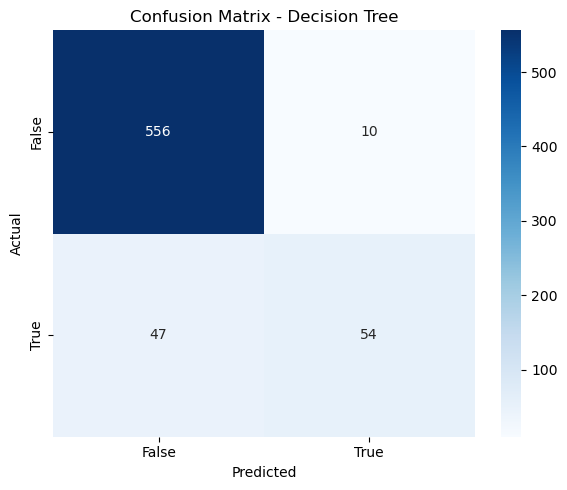

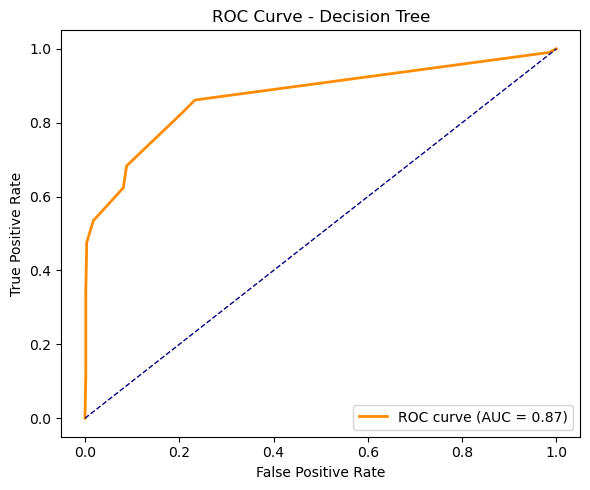

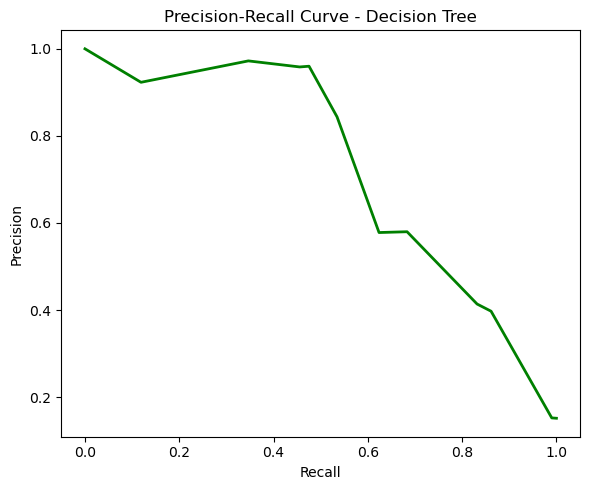

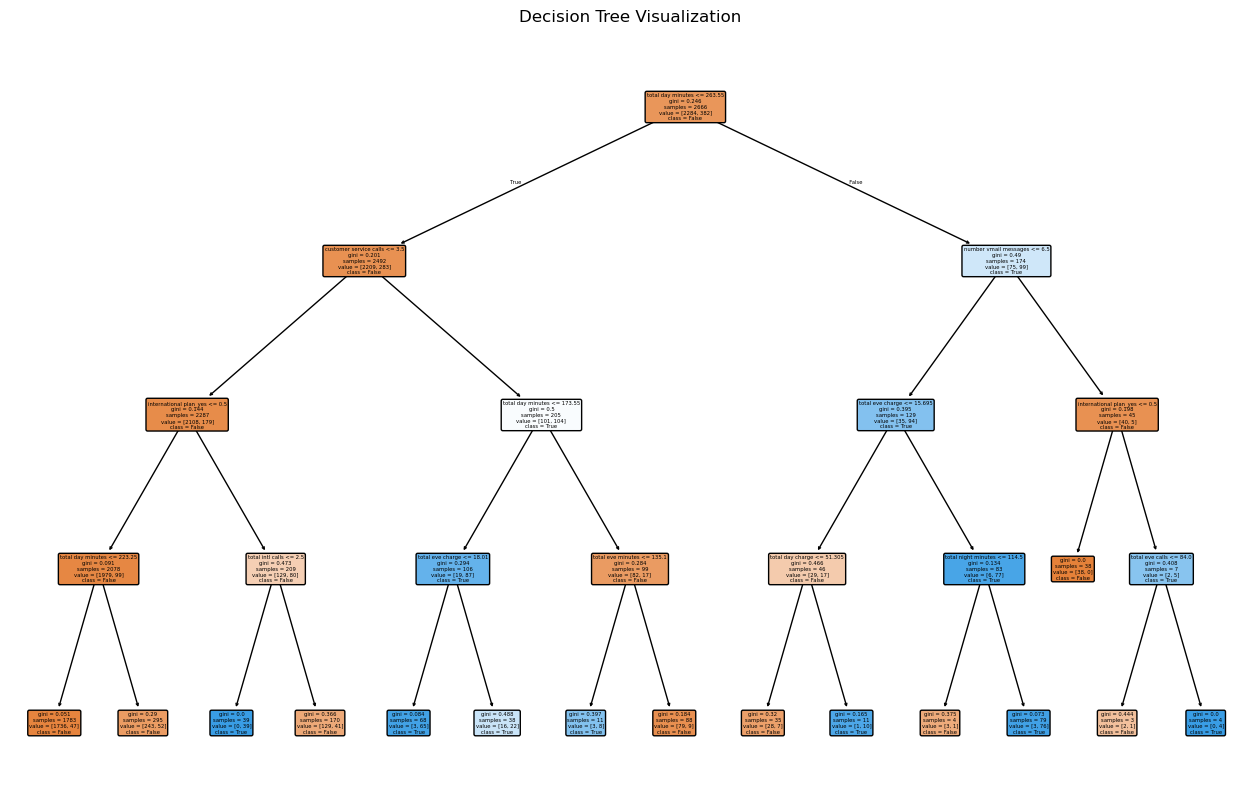

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve,
    RocCurveDisplay,
    PrecisionRecallDisplay
)
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Fit model
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:, 1]  # for ROC and PR curves

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_dt)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba_dt)
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Decision Tree')
plt.tight_layout()
plt.show()

# (Optional) Visualize the Decision Tree Structure
plt.figure(figsize=(16, 10))
plot_tree(dt, feature_names=X_train.columns, class_names=['False', 'True'], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()


### Model Tuning - Random Forest

In [11]:
from sklearn.model_selection import GridSearchCV

# Consider Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

params = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(rf, params, cv=5, scoring='recall')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Recall Score:", grid.best_score_)

# Evaluate best model
y_pred_rf = grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_rf))


Best Parameters: {'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Recall Score: 0.0
              precision    recall  f1-score   support

       False       0.85      1.00      0.92       566
        True       0.00      0.00      0.00       101

    accuracy                           0.85       667
   macro avg       0.42      0.50      0.46       667
weighted avg       0.72      0.85      0.78       667



c:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Visualization of the Random Forest:

Best Parameters: {'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Recall Score: 0.0

Classification Report:
               precision    recall  f1-score   support

       False       0.85      1.00      0.92       566
        True       0.00      0.00      0.00       101

    accuracy                           0.85       667
   macro avg       0.42      0.50      0.46       667
weighted avg       0.72      0.85      0.78       667



c:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


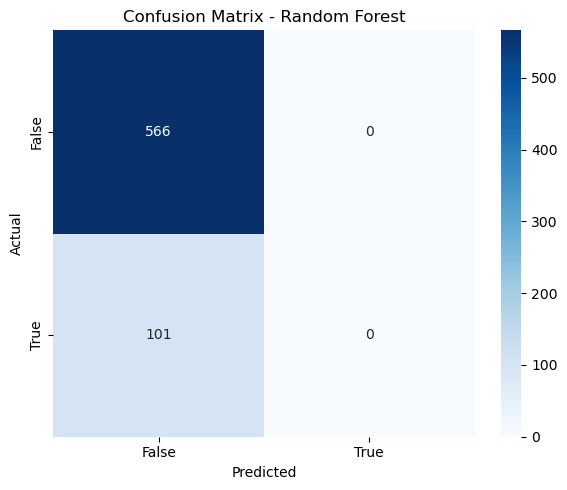

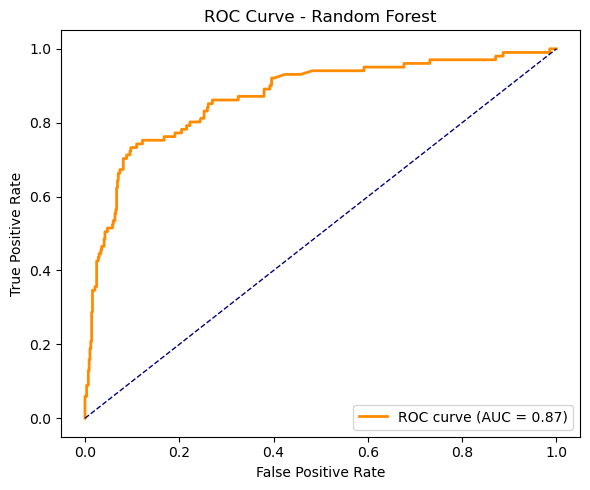

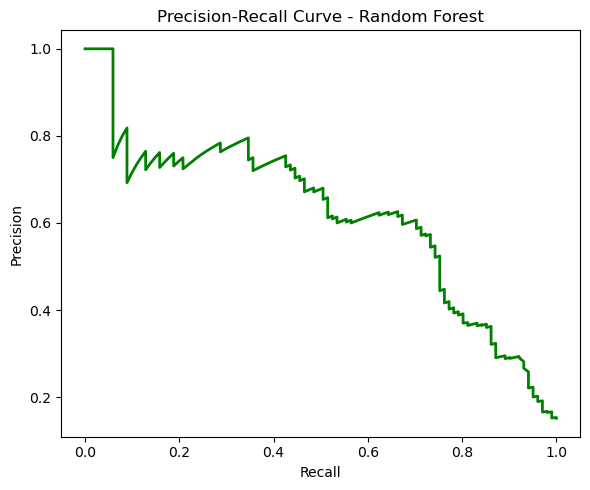

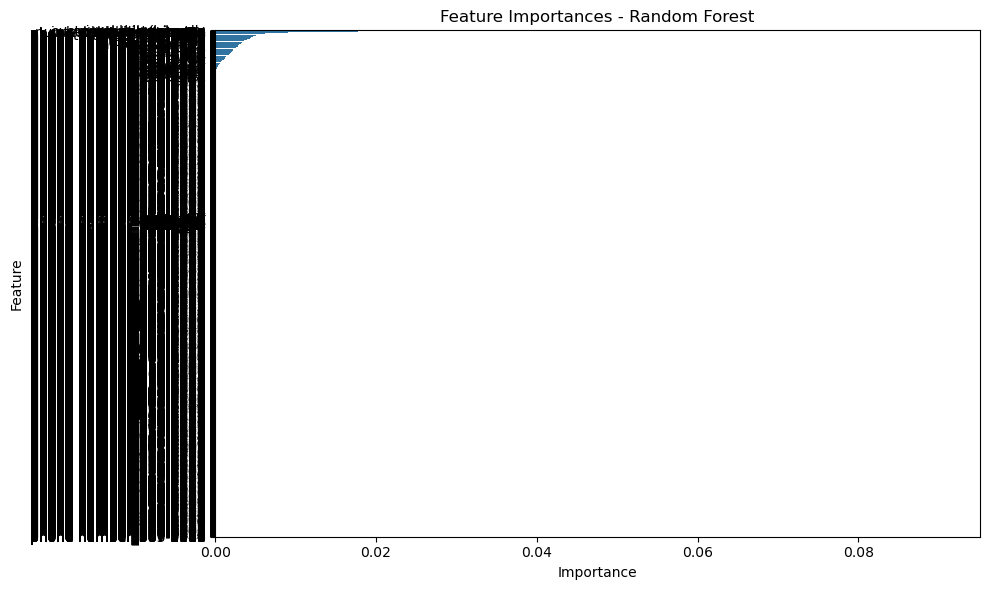

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define and fit the grid search
rf = RandomForestClassifier(random_state=42)

params = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(rf, params, cv=5, scoring='recall')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Recall Score:", grid.best_score_)

# Evaluate on test set
best_rf = grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]  # for ROC/PR curves

print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba_rf)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest')
plt.tight_layout()
plt.show()

# Feature Importance Plot
importances = best_rf.feature_importances_
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=np.array(feature_names)[indices])
plt.title('Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


## Evaluation
### Final Model: Random Forest

Random Forest is picked because:-
- Chosen for better recall (catching churners)
- Best parameters: {…}
- Test set recall: 0.0 %
- Top features: {plot feature importances}

## Business Implications (Findings & Recommendations)

- It is established that churn is most likely for customers with month-to-month contracts and high tech support needs.

- Recommendations:
    - To offer loyalty plans to month-to-month customers 
    - To Improve customer service efficiency for those with high-tech support needs



## Further Recommendations:

- Explore additional features (e.g., customer satisfaction scores if available)
- Test model performance on new customer segments
- Deploy model for live churn monitoring
